In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [44]:
df=pd.read_csv("bank-additional-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
print(df.shape)
print(df.columns)

(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [46]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [48]:
numeric_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
print(df[numeric_cols].skew())

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64


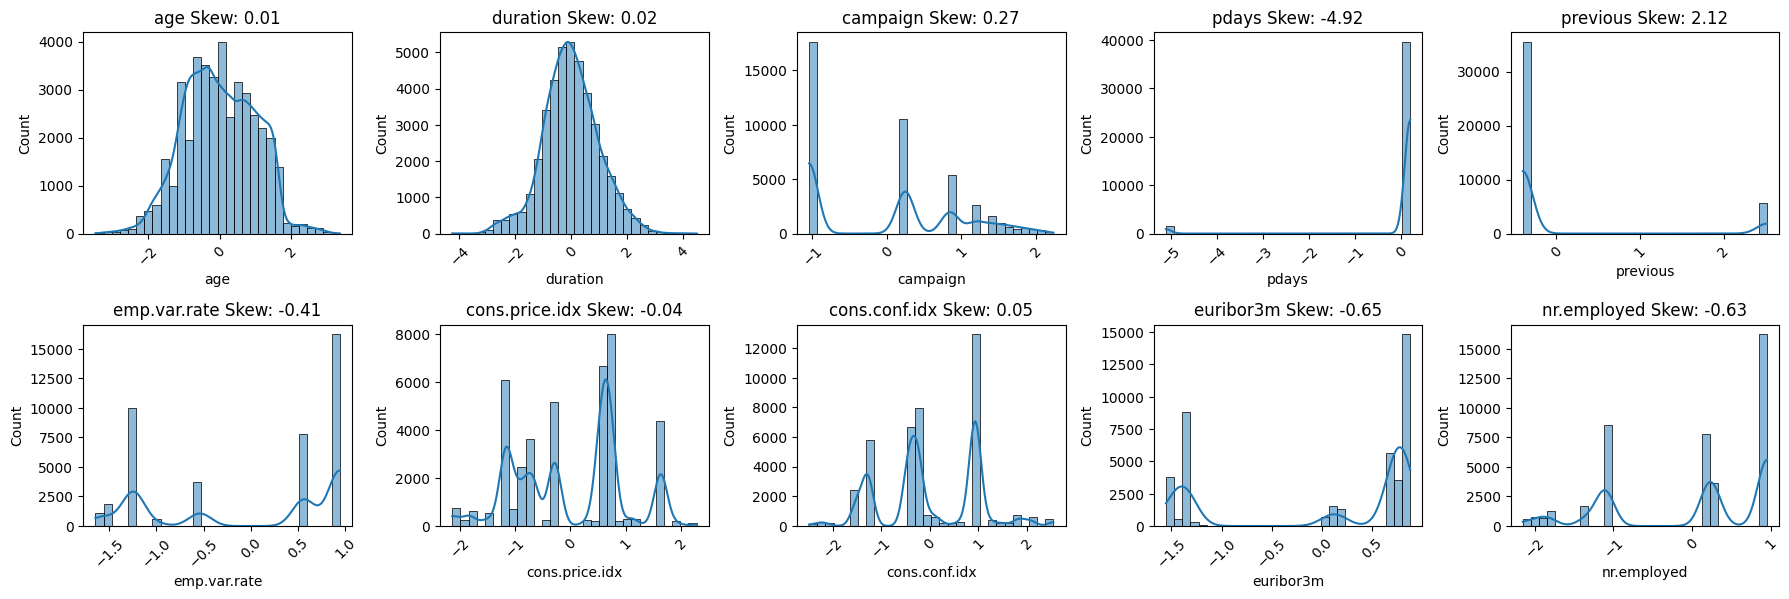

In [49]:
pt = PowerTransformer(method='yeo-johnson')  
df[numeric_cols] = pt.fit_transform(df[numeric_cols])

plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 5, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} Skew: {df[col].skew():.2f}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
df[numeric_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04,4.118800e+04
mean,-2.830406e-15,3.312232e-17,-1.649215e-16,-9.660676e-17,-1.062674e-16,3.105217e-17,-2.043923e-15,-7.783745e-16,8.004560e-17,-7.866551e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-3.486449e+00,-4.260853e+00,-1.045497e+00,-5.117304e+00,-3.977058e-01,-1.646120e+00,-2.144315e+00,-2.484063e+00,-1.552689e+00,-2.151144e+00
25%,-7.444859e-01,-6.318912e-01,-1.045497e+00,1.954154e-01,-3.977058e-01,-1.247456e+00,-8.869993e-01,-4.374819e-01,-1.355998e+00,-1.106966e+00
50%,-5.211620e-02,-2.919764e-02,2.450750e-01,1.954154e-01,-3.977058e-01,5.610168e-01,2.481260e-01,-2.317477e-01,7.136600e-01,2.043180e-01
75%,7.730364e-01,6.247336e-01,8.450476e-01,1.954154e-01,-3.977058e-01,9.399482e-01,7.007909e-01,9.117821e-01,8.031798e-01,9.496004e-01
max,3.366798e+00,4.498068e+00,2.233363e+00,1.954154e-01,2.518510e+00,9.399482e-01,2.284977e+00,2.546033e+00,8.766825e-01,9.496004e-01


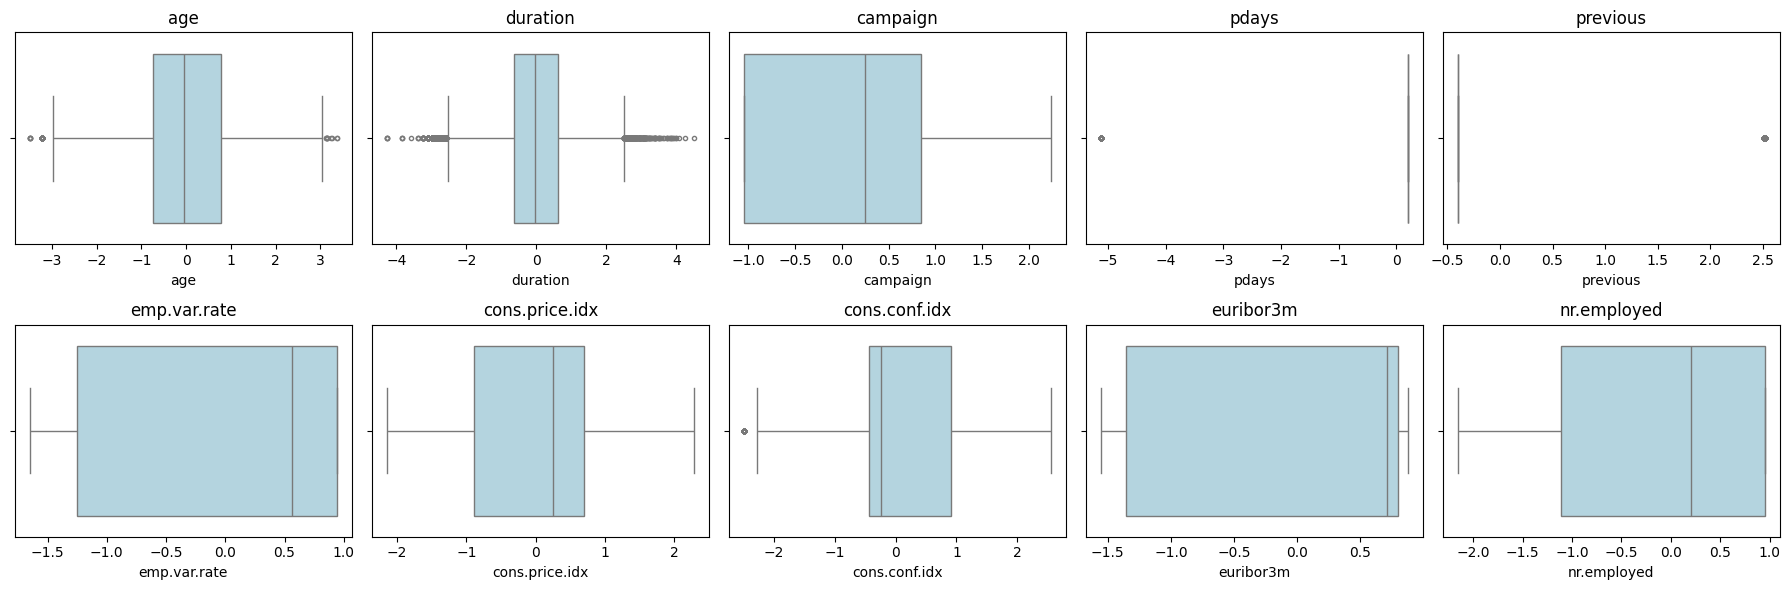

In [51]:
plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[col], color='lightblue', fliersize=3)
    plt.title(col)

plt.tight_layout()
plt.show()

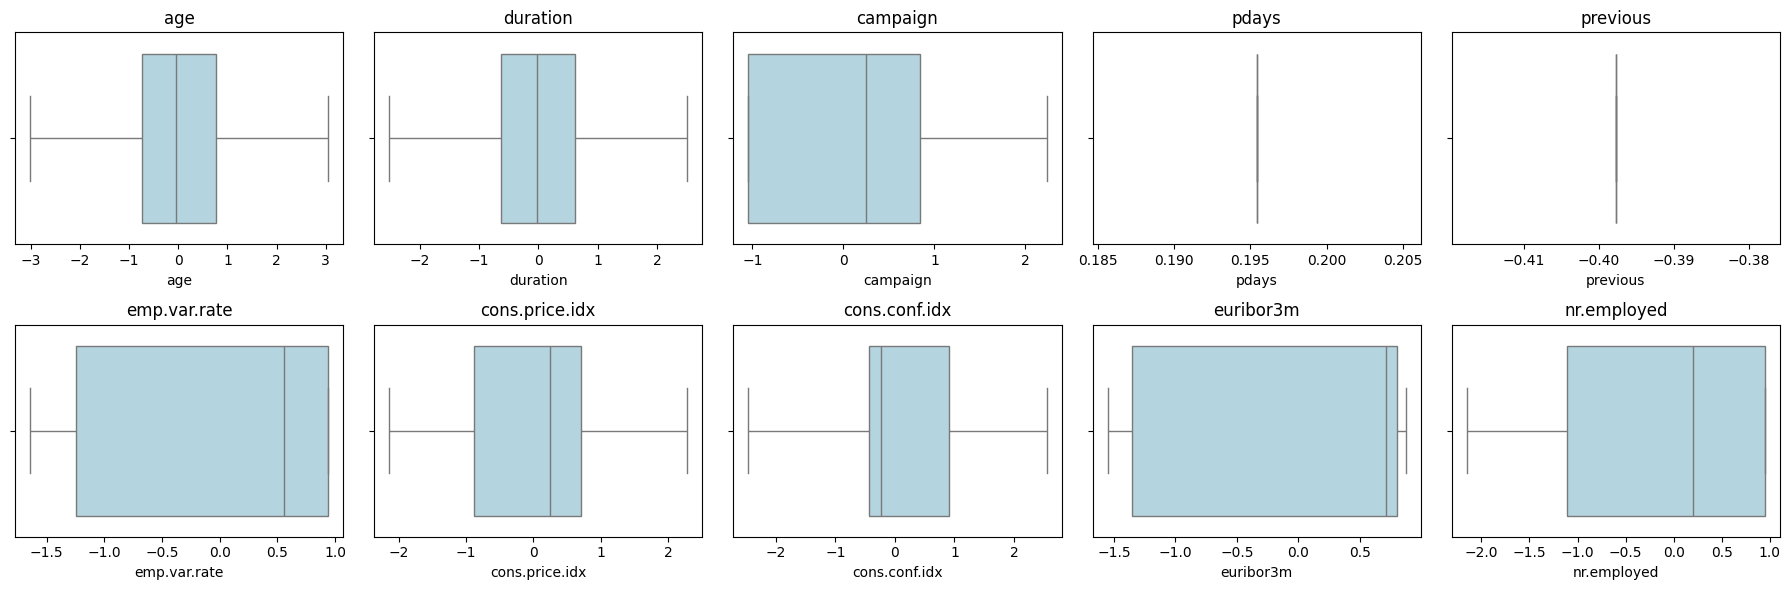

In [52]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

plt.figure(figsize=(18, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x=df[col], color='lightblue', fliersize=3)
    plt.title(col)
plt.tight_layout()
plt.show()

In [53]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome','y']
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le 

In [54]:
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [55]:
X = df.drop('y', axis=1)
y = df['y']

In [56]:
from imblearn.over_sampling import SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("After SMOTE:", y_train_res.value_counts())

After SMOTE: y
0    29238
1    29238
Name: count, dtype: int64


In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

In [63]:
model = Sequential([
    Dense(64, input_dim=X_train_res.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_res, y_train_res,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50


d:\AIWF\EDA_task1\myenv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1828/1828 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8763 - loss: 0.3087 - val_accuracy: 0.8542 - val_loss: 0.3057
Epoch 2/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8891 - loss: 0.2730 - val_accuracy: 0.8746 - val_loss: 0.2632
Epoch 3/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8976 - loss: 0.2574 - val_accuracy: 0.8400 - val_loss: 0.3419
Epoch 4/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9015 - loss: 0.2473 - val_accuracy: 0.8768 - val_loss: 0.2676
Epoch 5/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9048 - loss: 0.2401 - val_accuracy: 0.8778 - val_loss: 0.2528
Epoch 6/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9077 - loss: 0.2347 - val_accuracy: 0.8727 - val_loss: 0.2792
Epoch 7/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9088 - loss: 0.2305 - val_accuracy: 0.8821 - val_loss: 0.2528
Epoch 8/50
1828/1828 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9106 - loss: 0.2268 - val_accurac

In [59]:
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8480


258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step


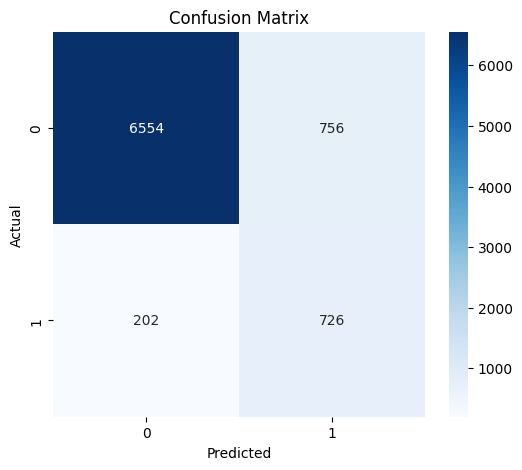


Classification Report:
              precision    recall  f1-score   support

           0     0.9701    0.8966    0.9319      7310
           1     0.4899    0.7823    0.6025       928

    accuracy                         0.8837      8238
   macro avg     0.7300    0.8395    0.7672      8238
weighted avg     0.9160    0.8837    0.8948      8238


ROC-AUC Score: 0.9299


In [60]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nROC-AUC Score: {roc_auc:.4f}")


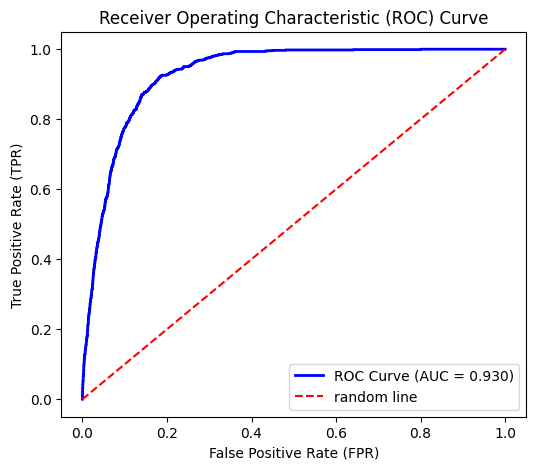

In [61]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='random line') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [62]:
import joblib
import tensorflow as tf
model = tf.keras.models.load_model("bank_model.h5")
joblib.dump(le_dict, "label_encoders.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "feature_names.pkl")

['feature_names.pkl']